In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import math
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from multiprocessing import Pool
import time
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dblp-2017-2019/2017_2019.pkl


In [2]:
# dtypes = {'title':'object','abstract':'object','authors':'object','year':'float64','referencecount':'int64','citationcount':'int64','influentialcitationcount':'int64','s2fieldsofstudy':'object'}

In [2]:
# chunks = pd.read_pickle('/kaggle/input/dblp-2017-2019/2017_2019.pkl',sep='\t',on_bad_lines='skip',usecols=['title','abstract','authors','year','referencecount','citationcount','influentialcitationcount','s2fieldsofstudy'],dtype=dtypes,chunksize=100000)
dataTable = pd.read_pickle('/kaggle/input/dblp-2017-2019/2017_2019.pkl')
dataTable.reset_index(inplace=True)
dataTable.drop(columns=['index'],inplace=True)

In [4]:
# chunks_list = [chunk for chunk in chunks]

In [5]:
# %%time
# data = pd.concat(chunks_list)

CPU times: user 1.25 s, sys: 419 ms, total: 1.66 s
Wall time: 1.67 s


In [4]:
# dataTable = pd.DataFrame(data)
# chunks_list.clear()
# dataTable.info()

NameError: name 'data' is not defined

In [3]:
dataTable

,abstract,title,authors,year,referencecount,citationcount,influentialcitationcount,s2fieldsofstudy
0,Smart buildings combine ICT and IoT technologi...,Ontology-based model for trusted critical site...,"[{'authorId': '2444673', 'name': 'S. Ahvar'}, ...",2017.0,18,7,1,"[{'category': 'Computer Science', 'source': 's..."
1,Special needs children with neurodevelopment d...,Enhancing perioperative transfer of special ne...,"[{'authorId': '12516161', 'name': 'H. Hee'}, {...",2017.0,12,2,0,"[{'category': 'Medicine', 'source': 's2-fos-mo..."
2,Treating interference as noise (TIN) as the mo...,Expanded GDoF-optimality Regime of Treating In...,"[{'authorId': '103583355', 'name': 'Soheil Ghe...",2017.0,27,18,1,"[{'category': 'Computer Science', 'source': 's..."
3,Attribute-based encryption enables fine-graine...,Expressive ciphertext-policy attribute-based e...,"[{'authorId': '4831117', 'name': 'Cuicui Bai'}...",2017.0,0,0,0,"[{'category': 'Computer Science', 'source': 's..."
4,"In this paper, we empirically compare the two ...",Comparing Recurrent and Convolutional Architec...,"[{'authorId': '1999296865', 'name': 'Sandhya S...",2017.0,15,8,0,"[{'category': 'Computer Science', 'source': 's..."
...,...,...,...,...,...,...,...,...
722983,: The class P attempts to capture the efficien...,Hardness in P,"[{'authorId': '1730630', 'name': 'Amir Abboud'}]",2017.0,0,1,0,"[{'category': 'Mathematics', 'source': 's2-fos..."
722984,Modern supercomputers are dominated by distrib...,Regent: a high-productivity programming langua...,"[{'authorId': '1666205054', 'name': 'Elliott S...",2017.0,65,3,0,"[{'category': 'Computer Science', 'source': 's..."
722985,"The popularity of wearable and mobile devices,...",Data science for human well-being,"[{'authorId': '1745524', 'name': 'Tim Althoff'}]",2018.0,0,0,0,"[{'category': 'Computer Science', 'source': 's..."
722986,Machine learning has established itself as an ...,Learning with N-grams: from massive scales to ...,"[{'authorId': '2624689', 'name': 'Hristo S. Pa...",2017.0,40,0,0,"[{'category': 'Computer Science', 'source': 's..."


In [4]:
def operation_set_1(df,my_list,researcher_ALI_1,researcher_ALI_2,researcher_ALI_3):     
    year_filtered_df = df
    dataTable = pd.DataFrame()
    target = 'Computer Science'
    
    academic_ALI_1 = researcher_ALI_1
    academic_ALI_2 = researcher_ALI_2
    academic_ALI_3 = researcher_ALI_3
    
    def extract_category(row):
        dict_list = row['s2fieldsofstudy']
        dict_converted = ast.literal_eval(dict_list)
        for dictionary in dict_converted:
            if(dictionary['category']==target):
                return 'Computer Science'
            else:
                return 'NOT CS'
    year_filtered_df['Field'] = year_filtered_df.apply(extract_category,axis=1)
    category_filtered_df = year_filtered_df[year_filtered_df['Field']=='Computer Science']
    year_filtered_df = pd.DataFrame()
    
    def extract_authors(row):
        dict_list2 = row['authors']
        dict_converted2 = ast.literal_eval(dict_list2)
        value_dict=dict()
        for dictionary in dict_converted2:
            if(dictionary['authorId']!=' '):
                value_dict[dictionary['authorId']] = dictionary['name']
            else:
                return 'null'
        return value_dict

    category_filtered_df['Author List'] = category_filtered_df.apply(extract_authors,axis=1)
    category_filtered_df = category_filtered_df[category_filtered_df['influentialcitationcount']!=0]
    category_filtered_df = category_filtered_df.drop('authors',axis=1)
    
    def get_author_ids(row):
        key_list=[]
        my_dict = row['Author List']
        key_list.extend(my_dict.keys())
        return key_list

    category_filtered_df['Author Id List'] = category_filtered_df.apply(get_author_ids,axis=1)
    category_filtered_df = category_filtered_df.explode('Author Id List')
    
    counts = category_filtered_df['Author Id List'].value_counts().reset_index()
    counts.columns = ['Author Id List','paper count']
    df_with_counts = category_filtered_df.merge(counts,on='Author Id List')
    
    def infcitation_to_paper(row):
        return (row['influentialcitationcount']/row['paper count'])
    def calculate_initial_ALI(row):
        return ((row['influentialcitationcount']*row['citationcount'])/row['paper count'])
    def calculate_ali_with_influentialcitationcount(row):
        return ((row['citationcount']*row['influentialcitationcount'])/(math.sqrt(row['citationcount'])*row['paper count']))
    
    df_with_counts['Corresponding ALI'] = df_with_counts.apply(calculate_initial_ALI,axis=1)
    df_with_counts['Corresponding ALI 2'] = df_with_counts.apply(calculate_ali_with_influentialcitationcount,axis=1)
    df_with_counts['Corresponding ALI 3'] = df_with_counts.apply(infcitation_to_paper,axis=1)
    
    ALI_sums = df_with_counts.groupby('Author Id List')['Corresponding ALI'].sum().reset_index(name='ALI_sum')
    testing_ali_df = df_with_counts.merge(ALI_sums,on='Author Id List')
    ALI_sums2 = df_with_counts.groupby('Author Id List')['Corresponding ALI 2'].sum().reset_index(name='ALI_sum2')
    testing_ali_df = testing_ali_df.merge(ALI_sums2,on='Author Id List')
    ALI_sums3 = df_with_counts.groupby('Author Id List')['Corresponding ALI 3'].sum().reset_index(name='ALI_sum3')
    testing_ali_df = testing_ali_df.merge(ALI_sums3,on='Author Id List')
    
    grouped_df = category_filtered_df.groupby('Author Id List')
#     print(grouped_df)
    
    ali_with_merged_df = operation_set_2(grouped_df,ALI_sums,ALI_sums2,ALI_sums3)
#     ali_with_merged_df.head()
    ali_merged_copy = ali_with_merged_df.copy()
    
    stop_words = set(stopwords.words('english'))
    
    def split_values(row,param):
        sentences = row[param]
        split_list = [word.lower() for sentence in sentences for word in sentence.split()]
        return split_list
    ali_merged_copy['split_title'] = ali_merged_copy.apply(split_values,axis=1,args=('title_values',))
    ali_merged_copy['split_abstract'] = ali_merged_copy.apply(split_values,axis=1,args=('abstract_values',))
    
    def remove_numbers(row,param):
        no_numbers = [r for r in row[param] if not r[0].isdigit()]
        return no_numbers
    ali_merged_copy['no_numbers_in_title'] = ali_merged_copy.apply(remove_numbers,axis=1,args=('split_title',))
    ali_merged_copy['no_numbers_in_abstract'] = ali_merged_copy.apply(remove_numbers,axis=1,args=('split_abstract',))
    
    #function to remove all stopwords
    def remove_stopwords(row,param):
        filtered_tokens = [token for token in row[param] if token not in stop_words]
        return filtered_tokens
    ali_merged_copy['no_stopwords_title'] = ali_merged_copy.apply(remove_stopwords,axis=1,args=('no_numbers_in_title',))
    ali_merged_copy['no_stopwords_abstract'] = ali_merged_copy.apply(remove_stopwords,axis=1,args=('no_numbers_in_abstract',))
    
    final_copy_2 = operation_set_3(ali_merged_copy)
    
    set1,set2,set3,set4,set5,res_df = operation_set_4(final_copy_2,my_list,academic_ALI_1,academic_ALI_2,academic_ALI_3)
    return [set1,set2,set3,set4,set5,res_df]

In [5]:
def operation_set_2(df_2,ALI_sums,ALI_sums2,ALI_sums3):
    grouped_df = df_2
    def abstract_values(group):
        # Group the values in the 'data_column' column
        grouped_values = group['abstract'].tolist()
        return grouped_values
    grouped_abstract_values_df = grouped_df.apply(abstract_values)
    grouped_abstract_values_df.name = 'abstract_values'
    grouped_abstract_values_df = grouped_abstract_values_df.reset_index()
    
    def title_values(group):
        # Group the values in the 'data_column' column
        grouped_title_values = group['title'].tolist()
        return grouped_title_values
    grouped_title_values_df = grouped_df.apply(title_values)
    grouped_title_values_df.name = 'title_values'
    grouped_title_values_df = grouped_title_values_df.reset_index()

    def year_values(group):
        # Group the values in the 'data_column' column
        grouped_year_values = group['year'].tolist()
        return grouped_year_values
    grouped_year_values_df = grouped_df.apply(year_values)
    grouped_year_values_df.name = 'year_values'
    grouped_year_values_df = grouped_year_values_df.reset_index()

    def referencecount_values(group):
        # Group the values in the 'data_column' column
        grouped_referencecount_values = group['referencecount'].tolist()
        return grouped_referencecount_values
    grouped_referencecount_values_df = grouped_df.apply(referencecount_values)
    grouped_referencecount_values_df.name = 'referencecount_values'
    grouped_referencecount_values_df = grouped_referencecount_values_df.reset_index()
    
    def citationcount_values(group):
        # Group the values in the 'data_column' column
        grouped_citationcount_values = group['citationcount'].tolist()
        return grouped_citationcount_values
    grouped_citationcount_df = grouped_df.apply(citationcount_values)
    grouped_citationcount_df.name = 'citationcount_values'
    grouped_citationcount_df = grouped_citationcount_df.reset_index()
    
    def influentialcitationcount_values(group):
        # Group the values in the 'data_column' column
        grouped_influentialcitationcount_values = group['influentialcitationcount'].tolist()
        return grouped_influentialcitationcount_values
    grouped_influentialcitationcount_values_df = grouped_df.apply(influentialcitationcount_values)
    grouped_influentialcitationcount_values_df.name = 'influentialcitationcount_values'
    grouped_influentialcitationcount_values_df = grouped_influentialcitationcount_values_df.reset_index()
    grouped_influentialcitationcount_values_df
    
    single_dataframe_list = [grouped_abstract_values_df,grouped_title_values_df,grouped_year_values_df,grouped_referencecount_values_df,grouped_citationcount_df,grouped_influentialcitationcount_values_df]
    merged_df = single_dataframe_list[0]
    for df in single_dataframe_list[1:]:
        merged_df = pd.merge(merged_df,df,on='Author Id List')
        
    ali_with_merged_df = merged_df.merge(ALI_sums,on='Author Id List')
    ali_with_merged_df = ali_with_merged_df.merge(ALI_sums2,on='Author Id List')
    ali_with_merged_df = ali_with_merged_df.merge(ALI_sums3,on='Author Id List')
    return ali_with_merged_df

In [6]:
def operation_set_3(df_3):
    secondary_copy = df_3
    
    secondary_copy['log2_ALI'] = np.log2(secondary_copy['ALI_sum'])
    secondary_copy['log2_ALI2'] = np.log2(secondary_copy['ALI_sum2'])
    
    random_words = ['model','recommendation','network','networks','dataset','neural','adversarial','generative','machine']
    ML = ['Python','autoencoder','transform', 'TensorFlow', 'PyTorch', 'Keras', 'Scikit-learn', 'Pandas', 'NumPy', 'Matplotlib', 'Seaborn','Jupyter Notebook', 'Regression', 'Classification', 'Clustering', 'Decision Trees', 'Random Forest','Support Vector Machines', 'Artificial Neural Networks', 'Deep Learning', 'Convolutional Neural Networks','Recurrent Neural Networks', 'Autoencoders', 'Generative Adversarial Networks', 'Reinforcement Learning','Q-Learning', 'Markov Decision Processes', 'Principal Component Analysis', 'Linear Discriminant Analysis','Gaussian Mixture Models', 'Bayesian Networks', 'Hidden Markov Models', 'Gradient Descent','Stochastic Gradient Descent', 'Mini-batch Gradient Descent', 'Adam Optimizer', 'Regularization','L1 Regularization', 'L2 Regularization', 'Dropout', 'Early Stopping', 'Cross-Validation','Hyperparameter Tuning', 'Grid Search', 'Random Search', 'Bayesian Optimization', 'Ensemble Learning','Bagging', 'Boosting', 'Stacking', 'XGBoost', 'LightGBM']
    CNS = ['Computer Networks','protocol', 'Data Communication', 'Transmission Control Protocol (TCP)','Internet Protocol (IP)', 'Address Resolution Protocol (ARP)', 'User Datagram Protocol (UDP)','Domain Name System (DNS)', 'Dynamic Host Configuration Protocol (DHCP)', 'Network Address Translation (NAT)','Routing', 'Distance Vector Routing Protocol', 'Link State Routing Protocol', 'Open Shortest Path First (OSPF)','Border Gateway Protocol (BGP)', 'Spanning Tree Protocol (STP)', 'Virtual Local Area Network (VLAN)','Ethernet', 'Media Access Control (MAC) Address', 'Quality of Service (QoS)', 'Network Congestion Control','Packet Switching', 'Circuit Switching', 'Message Switching', 'Internet', 'World Wide Web', 'Hypertext Transfer Protocol (HTTP)','Secure Sockets Layer (SSL)', 'Transport Layer Security (TLS)', 'File Transfer Protocol (FTP)', 'Simple Mail Transfer Protocol (SMTP)','Post Office Protocol (POP)', 'Internet Message Access Protocol (IMAP)', 'Simple Network Management Protocol (SNMP)','Virtual Private Network (VPN)', 'Firewall', 'Intrusion Detection System (IDS)', 'Intrusion Prevention System (IPS)','Denial-of-Service (DoS)', 'Distributed Denial-of-Service (DDoS)', 'Packet Analyzer', 'Network Analyzer','Wireless Networks', 'Bluetooth', 'WiFi', 'Long-Term Evolution (LTE)', '5G Networks', 'IPv6', 'Multicast','Multiprotocol Label Switching (MPLS)', 'Session Initiation Protocol (SIP)']
    stats = ['Statistics', 'Descriptive Statistics', 'Inferential Statistics', 'Population', 'Sample','Random Sampling', 'Central Tendency', 'Mean', 'Median', 'Mode', 'Dispersion', 'Variance', 'Standard Deviation','Range', 'Interquartile Range (IQR)', 'Normal Distribution', 'Standard Normal Distribution','Z-Score', 'Central Limit Theorem', 'Hypothesis Testing', 'Null Hypothesis', 'Alternative Hypothesis','Type I Error', 'Type II Error', 'p-Value', 'Confidence Interval', 'T-Test', 'Analysis of Variance (ANOVA)','Regression Analysis', 'Correlation', 'Pearson Correlation Coefficient', 'Spearman Correlation Coefficient','Covariance', 'Multiple Linear Regression', 'Logistic Regression', 'Generalized Linear Model (GLM)','Maximum Likelihood Estimation (MLE)', 'Bayesian Statistics', 'Bayesian Inference', 'Bayesian Networks','Markov Chain Monte Carlo (MCMC)', 'Monte Carlo Simulation', 'Nonparametric Statistics', 'Chi-Square Test','Wilcoxon Signed-Rank Test', 'Mann-Whitney U Test', 'Kruskal-Wallis Test', 'Friedman Test', 'Bootstrap Sampling','Resampling', 'Cross','Validation']
    DBMS = ['Database', 'Relational Database', 'NoSQL Database', 'Data Model', 'Entity-Relationship Model','Relational Model', 'Hierarchical Model', 'Network Model', 'Object-Oriented Model', 'Data Definition Language (DDL)','Data Manipulation Language (DML)', 'Structured Query Language (SQL)', 'Normalization', 'First Normal Form (1NF)','Second Normal Form (2NF)', 'Third Normal Form (3NF)', 'Denormalization', 'Indexing', 'B-Tree', 'Hash Index','Clustered Index', 'Non-Clustered Index', 'Transaction', 'Concurrency Control', 'ACID Properties', 'Isolation Level','Locking', 'Deadlock', 'Data Warehousing', 'Data Mining', 'ETL Process', 'OLAP', 'OLTP', 'Data Mart','Database Administrator (DBA)', 'Backup', 'Recovery', 'Replication', 'Sharding', 'Partitioning', 'Database Security','Authentication', 'Authorization', 'Role-Based Access Control (RBAC)', 'Auditing', 'Data Privacy', 'General Data Protection Regulation (GDPR)','Big Data', 'Hadoop', 'MapReduce']
    DSA = ['Data Structures', 'Arrays', 'Linked Lists', 'Stacks', 'Queues', 'Trees', 'Binary Trees', 'Binary Search Trees','Heaps', 'Hash Tables', 'Graphs', 'Adjacency Matrix', 'Adjacency List', 'Breadth-First Search (BFS)','Depth-First Search (DFS)', 'Topological Sort', 'Shortest Path Algorithms', 'Dijkstra Algorithm', 'Bellman-Ford Algorithm','Floyd-Warshall Algorithm', 'Greedy Algorithms', 'Kruskal Algorithm', 'Prim Algorithm', 'Dynamic Programming','Memoization', 'Knapsack Problem', 'Longest Common Subsequence', 'Divide-and-Conquer Algorithms', 'Merge Sort','Quick Sort', 'Binary Search', 'Selection Sort', 'Insertion Sort', 'Bubble Sort', 'Heap Sort', 'Radix Sort','Hashing', 'Collision Resolution Techniques', 'Open Addressing', 'Separate Chaining', 'Big O Notation','Asymptotic Analysis', 'Time Complexity', 'Space Complexity', 'Algorithms Paradigms', 'Brute Force Algorithms','Backtracking Algorithms', 'Randomized Algorithms', 'Approximation Algorithms', 'Parallel Algorithms']
    DMS = ['Discrete Mathematics', 'Set Theory', 'Subset', 'Power Set', 'Union', 'Intersection', 'Complement', 
             'Cartesian Product', 'Relations', 'Functions', 'Injective Function', 'Surjective Function', 'Bijective Function', 
             'Composition of Functions', 'Inverse Function', 'Partial Order', 'Total Order', 'Well-Ordering Principle', 
             'Equivalence Relation', 'Equivalence Classes', 'Modular Arithmetic', 'Congruence Relation', 'Boolean Algebra', 
             'Logic Gates', 'Truth Table', 'Propositional Logic', 'Predicate Logic', 'Universal Quantifier', 'Existential Quantifier', 
             'De Morgan\'s Laws', 'Logical Equivalence', 'Rules of Inference', 'Proof Techniques', 'Direct Proof', 'Proof by Contradiction', 
             'Mathematical Induction', 'Strong Induction', 'Recursive Definition', 'Recurrence Relation', 'Generating Function', 
             'Counting Principles', 'Product Rule', 'Sum Rule', 'Permutation', 'Combination', 'Binomial Coefficient', 'Pascal\'s Triangle', 
             'Inclusion-Exclusion Principle', 'Pigeonhole Principle', 'Ramsey Theory', 'Graph Theory', 'Graph', 'Walk', 'Path', 'Cycle']
    oncology = ['Oncology', 'Cancer', 'Tumor', 'Metastasis', 'Chemotherapy', 'Radiation', 'Immunotherapy', 'Precision medicine',
             'Clinical trial', 'Targeted therapy', 'Cancer survivor', 'Palliative care', 'Oncogene', 'Tumor suppressor gene',
             'Apoptosis', 'Angiogenesis', 'Carcinoma', 'Sarcoma', 'Leukemia', 'Lymphoma', 'Myeloma', 'Neuroblastoma',
             'Breast cancer', 'Lung cancer', 'Colon cancer', 'Prostate cancer', 'Skin cancer', 'Liver cancer',
             'Pancreatic cancer', 'Ovarian cancer', 'Cervical cancer', 'Testicular cancer', 'Thyroid cancer', 'Glioblastoma',
             'Malignant', 'Benign', 'Metastatic', 'In situ', 'Lymph node', 'Bone marrow', 'Staging', 'Grading',
             'Biopsy', 'Mammogram', 'PET scan', 'CT scan', 'MRI', 'Genetic testing', 'Epigenetics', 'Biomarker', 'Tumor board']
    neurology= ['Neurology', 'Neuron', 'Synapse', 'Axon', 'Dendrite', 'Action potential', 'Myelin', 'Neurotransmitter',
             'Central nervous system', 'Peripheral nervous system', 'Brain', 'Spinal cord', 'Cerebellum', 'Cerebral cortex',
             'Hippocampus', 'Amygdala', 'Thalamus', 'Basal ganglia', 'Medulla oblongata', 'Frontal lobe', 'Temporal lobe',
             'Parietal lobe', 'Occipital lobe', 'Grey matter', 'White matter', 'Sensory system', 'Motor system', 'Somatosensory',
             'Visual system', 'Auditory system', 'Olfactory system', 'Gustatory system', 'Neuroplasticity', 'Neurodegeneration',
             'Stroke', 'Epilepsy', 'Parkinson\'s disease', 'Multiple sclerosis', 'Alzheimer\'s disease', 'Huntington\'s disease',
             'Amyotrophic lateral sclerosis (ALS)', 'Dementia', 'Migraine', 'Headache', 'Cerebral palsy', 'Spinal cord injury',
             'Traumatic brain injury', 'Electroencephalogram (EEG)', 'Magnetic resonance imaging (MRI)', 'Positron emission tomography (PET)',
             'Computed tomography (CT)', 'Neuropsychology']
    cardiology = ['Cardiology', 'Heart', 'Aorta', 'Pulmonary artery', 'Pulmonary vein', 'Coronary artery', 'Myocardium',
             'Endocardium', 'Pericardium', 'Atrium', 'Ventricle', 'Sinoatrial (SA) node', 'Atrioventricular (AV) node',
             'Bundle of His', 'Purkinje fibers', 'Cardiac cycle', 'Cardiac output', 'Blood pressure', 'Echocardiogram',
             'Electrocardiogram (ECG)', 'Stress test', 'Coronary angiogram', 'Angina', 'Heart attack', 'Heart failure',
             'Arrhythmia', 'Atrial fibrillation', 'Ventricular fibrillation', 'Bradycardia', 'Tachycardia', 'Cardiac arrest',
             'Valve disease', 'Mitral valve', 'Aortic valve', 'Tricuspid valve', 'Pulmonary valve', 'Congenital heart disease',
             'Hypertension', 'Hypotension', 'Atherosclerosis', 'Hypercholesterolemia', 'Obesity', 'Smoking', 'Diabetes',
             'Metabolic syndrome', 'Infective endocarditis', 'Rheumatic fever', 'Cardiomyopathy', 'Heart transplantation']
    bioinformatics = ['Bioinformatics', 'Genome', 'DNA', 'RNA', 'Protein', 'Sequence', 'Alignment', 'BLAST', 'FASTA', 'Phylogenetics',
             'Clustering', 'Homology', 'Structural biology', 'Molecular dynamics', 'Molecular docking', 'Molecular modeling',
             'Protein-protein interaction', 'Protein-ligand interaction', 'Systems biology', 'Metabolomics', 'Transcriptomics',
             'Proteomics', 'Genomics', 'Gene expression', 'Epigenetics', 'SNP', 'GWAS', 'CRISPR', 'RNA-seq', 'Microarray',
             'ChIP-seq', 'DNA sequencing', 'Sequence assembly', 'Genome annotation', 'Gene prediction', 'Metagenomics',
             'Phenomics', 'Bioimage analysis', 'Network analysis', 'Pathway analysis', 'Drug discovery', 'Virtual screening',
             'Protein engineering', 'Biological databases', 'NCBI', 'UniProt', 'KEGG', 'GO', 'PDB', 'Clustal']
    astrophysics = ['Astrophysics', 'Universe', 'Galaxy', 'Star', 'Planet', 'Black hole', 'Dark matter', 'Dark energy', 'Cosmic rays',
             'Neutron star', 'Supernova', 'Gamma ray burst', 'Big Bang', 'Cosmic microwave background', 'Redshift', 'Quasar',
             'Active galactic nucleus', 'Supermassive black hole', 'Gravitational wave', 'Hubble Space Telescope', 'Chandra X-ray Observatory',
             'Spitzer Space Telescope', 'James Webb Space Telescope', 'Kepler Space Telescope', 'Planetarium', 'Stellar evolution',
             'Nuclear fusion', 'Neutrino', 'Interstellar medium', 'Ionization', 'Orbit', 'Asteroid', 'Comet', 'Meteor',
             'Exoplanet', 'Habitable zone', 'Stellar population', 'Cosmology', 'Inflation', 'Cosmic inflation', 'Inflationary universe',
             'Cosmic web', 'Large-scale structure', 'Olber\'s paradox', 'Steady state theory', 'Nucleosynthesis', 'Helium flash', 'Solar wind']
    chemistry = ['Chemistry', 'Atom', 'Molecule', 'Element', 'Periodic table', 'Chemical bond', 'Ionic bond', 'Covalent bond',
             'Van der Waals force', 'Hydrogen bond', 'Acid', 'Base', 'pH', 'Redox reaction', 'Thermodynamics',
             'Entropy', 'Enthalpy', 'Gibbs free energy', 'Kinetics', 'Activation energy', 'Catalysis', 'Chemical equilibrium',
             'Solubility', 'Colligative properties', 'Osmosis', 'Diffusion', 'Boiling point', 'Melting point', 'Phase diagram',
             'Spectroscopy', 'Infrared spectroscopy', 'Nuclear magnetic resonance spectroscopy', 'Mass spectrometry',
             'X-ray crystallography', 'Chromatography', 'Gas chromatography', 'Liquid chromatography', 'Column chromatography',
             'Thin layer chromatography', 'Electrochemistry', 'Electrolysis', 'Galvanic cell', 'Nernst equation', 'Faraday constant',
             'Hess\'s law', 'Ideal gas law', 'Charles\'s law', 'Boyle\'s law', 'Avogadro\'s law', 'Dalton\'s law']
    electronics = ['Electronics', 'Communication', 'Analog', 'Digital', 'Signal', 'Circuit', 'Microcontroller', 'Microprocessor',
             'Transistor', 'Diode', 'Capacitor', 'Inductor', 'Resistor', 'Amplifier', 'Oscillator', 'Filter', 'Modulation',
             'Demodulation', 'Frequency', 'Bandwidth', 'Noise', 'Interference', 'Attenuation', 'Propagation', 'Antenna',
             'Wireless', 'Bluetooth', 'Wi-Fi', 'LTE', '5G', 'Satellite', 'Radar', 'Sonar', 'Optical communication', 'Fiber optic',
             'Photonics', 'Integrated circuit', 'Field effect transistor', 'Voltage regulator', 'Rectifier', 'Switching',
             'Power electronics', 'Electric vehicle', 'Renewable energy', 'Solar cell', 'Wind turbine', 'Battery',
             'Printed circuit board', 'Electronic design automation', 'SPICE', 'VHDL', 'Verilog']
    mechanics = ['Mechanical engineering', 'Thermodynamics', 'Fluid mechanics', 'Heat transfer', 'Material science',
             'Structural analysis', 'Finite element analysis', 'Control systems', 'Mechatronics', 'Robotics', 'CAD',
             'Manufacturing', 'Machining', 'Casting', 'Forging', 'Welding', 'Sheet metal forming', 'Injection molding',
             '3D printing', 'CAM', 'CNC', 'G-code', 'Machine tool', 'Machine design', 'Mechanical vibration', 'Fatigue',
             'Fracture mechanics', 'Non-destructive testing', 'Wear', 'Tribology', 'Bearings', 'Gears', 'Springs', 'Shafts',
             'Couplings', 'Brakes', 'Clutches', 'Hydraulics', 'Pneumatics', 'Thermal power plants', 'Refrigeration',
             'Air conditioning', 'HVAC', 'Renewable energy', 'Wind turbines', 'Solar panels', 'Fuel cells', 'Cryogenics',
             'Nanotechnology']



    misc = ['recurrent neural networs','convolutional neural networks','autoencoder','object detection','opencv']
    CS = ['Artificial Intelligence', 'Machine Learning', 'Natural Language Processing', 'Computer Vision','Reinforcement Learning', 'Deep Learning', 'Neural Networks', 'Evolutionary Computing', 'Swarm Intelligence','Expert Systems', 'Fuzzy Logic', 'Quantum Computing', 'Cloud Computing', 'Distributed Systems', 'Parallel Computing','High-Performance Computing', 'Data Science', 'Big Data Analytics', 'Information Retrieval', 'Web Search','Semantic Web', 'Blockchain', 'Cryptocurrency', 'Cybersecurity', 'Computer Networks', 'Wireless Networks','Mobile Computing', 'Internet of Things (IoT)', 'Edge Computing', 'Human-Computer Interaction', 'Virtual Reality','Augmented Reality', 'Gamification', 'Computer Graphics', '3D Printing', 'Robotics', 'Autonomous Systems','Computer-Aided Design (CAD)', 'Computer Music', 'Digital Forensics', 'E-Commerce', 'E-Learning', 'E-Health','Quantum Cryptography', 'Adversarial Machine Learning', 'Explainable AI', 'Fairness in Machine Learning','Machine Learning Interpretability', 'Privacy-Preserving Machine Learning']
    necessary_words = random_words + ML + CNS + stats + DBMS + DSA + DMS + CS + oncology + neurology + cardiology + bioinformatics + astrophysics + chemistry + electronics + mechanics + misc
    split_necc_words = [word.lower() for sentence in necessary_words for word in sentence.split()]
    final_word_list=[]
    for string in split_necc_words:
        if not string.startswith('(') and len(string)>2 and final_word_list.count(string)==0:
            final_word_list.append(string)

    def count_necessary_words(row,param):
        counts = dict(Counter(word for word in row[param] if word in final_word_list))
        return counts

    batch_size = 100000
    num_of_rows = len(secondary_copy)

    final_copy = pd.DataFrame()

    for i in tqdm(range(0,num_of_rows,batch_size)):
        start_idx = i
        end_idx = min(i + batch_size, num_of_rows)
        batch_df = secondary_copy.iloc[start_idx:end_idx]
        with Pool(4) as p:
            #changed from no_stopwords_title to title_values
            batch_df['Title_counts'] = df_3.apply(count_necessary_words, axis=1,args=('no_stopwords_title',))
#             batch_df['Abstract_counts'] = df_3.apply(count_necessary_words, axis=1,args=('no_stopwords_abstract',))
        final_copy = pd.concat([final_copy,batch_df]) 
        print(f'Processed rows from {start_idx+1} to {end_idx}')
    final_copy.reset_index(inplace=True)
    
    return final_copy

In [7]:
def operation_set_4(df_4,my_list,ali1,ali2,ali3):
    logali1 = math.log2(ali1)
    logali2 = math.log2(ali2)
    temp_4 = df_4
    current_domain_list = my_list
    def get_matching_values(row,current_domain_list):
        matched_sum = 0
        for k in row['Title_counts'].keys():
            if k in current_domain_list:
                matched_sum += row['Title_counts'][k]
        return matched_sum
#         matched_sum = 0
#         for dom in current_domain_list:
#             if dom in row['Title_counts']:
#                 matched_sum += row['Title_counts'][dom]
#         return matched_sum
    
    temp_4['Frequency'] = temp_4.apply(lambda x: get_matching_values(x,current_domain_list),axis=1)
    
#     def get_ratio(row):
#         return round(row['ALI_sum2']/row['Frequency'],3)
    
#     temp_4['Ratio'] = temp_4.apply(lambda x: get_ratio(x),axis=1)
    
#     bins = [0,100,500,float('inf')]
#     labels = ['Not Recommended', 'Potential', 'Recommended']
#     temp_4['class'] = pd.cut(temp_4['matched_sum'], bins=bins, labels=labels)
    
#     temp_4 = temp_4.sort_values(by=['Ratio'],ascending=False)
    diff_ali1 = temp_4.nlargest(200,'Frequency')
    diff_ali2 = temp_4.nlargest(200,'Frequency')
    diff_ali3 = temp_4.nlargest(200,'Frequency')
    diff_logali1 = temp_4.nlargest(200,'Frequency')
    diff_logali2 = temp_4.nlargest(200,'Frequency')
    diff_ali1 = (diff_ali1['ALI_sum'] - ali1).abs()
    diff_ali2 = (diff_ali2['ALI_sum2'] - ali2).abs()
    diff_ali3 = (diff_ali3['ALI_sum3'] - ali3).abs()
    diff_logali1 = (diff_logali1['log2_ALI'] - logali1).abs()
    diff_logali2 = (diff_logali2['log2_ALI2'] - logali2).abs()
    matched_rows_ali1 = diff_ali1.loc[diff_ali1.nsmallest(20).index]
    matched_rows_ali2 = diff_ali2.loc[diff_ali2.nsmallest(20).index]
    matched_rows_ali3 = diff_ali3.loc[diff_ali3.nsmallest(20).index]
    matched_rows_logali1 = diff_logali1.loc[diff_logali1.nsmallest(20).index]
    matched_rows_logali2 = diff_logali2.loc[diff_logali2.nsmallest(20).index]
    
    return [pd.DataFrame(matched_rows_ali1),pd.DataFrame(matched_rows_ali2),pd.DataFrame(matched_rows_ali3),pd.DataFrame(matched_rows_logali1),pd.DataFrame(matched_rows_logali2),temp_4]


In [8]:
auth_id = input(print("Enter your unique identification number: "))
domain = input(print('Enter your domains: '))
paper_count = int(input(print('Enter the number of your published papers: ')))
influentialcitation_count = int(input(print('Enter your current total influential citation count: ')))
citation_count = int(input(print('Enter your current total citation count: ')))
scholar_ALI_1 = ((influentialcitation_count*citation_count)/paper_count)
scholar_ALI_2 = ((citation_count*influentialcitation_count)/(math.sqrt(citation_count)*paper_count))
scholar_ALI_3 = (influentialcitation_count/paper_count)
domain_list = domain.split()
domain_list = [x.lower() for x in domain_list]
print(f'Your ALI_sum1 is {scholar_ALI_1} , ALI_sum2 is {scholar_ALI_2} and ALI_sum3 is {scholar_ALI_3}')

Enter your unique identification number: 


None 201


Enter your domains: 


None Adversarial


Enter the number of your published papers: 


None 6


Enter your current total influential citation count: 


None 4


Enter your current total citation count: 


None 17


Your ALI_sum1 is 11.333333333333334 , ALI_sum2 is 2.748737083745107 and ALI_sum3 is 0.6666666666666666


In [9]:
%%time
res1,res2,res3,res4,res5,res_df = operation_set_1(dataTable,domain_list,scholar_ALI_1,scholar_ALI_2,scholar_ALI_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/3 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 33%|███▎      | 1/3 [00:55<01:51, 55.59s/it]

Processed rows from 1 to 100000


 67%|██████▋   | 2/3 [01:50<00:55, 55.48s/it]

Processed rows from 100001 to 200000


100%|██████████| 3/3 [02:46<00:00, 55.44s/it]

Processed rows from 200001 to 238560


CPU times: user 6min 44s, sys: 12 s, total: 6min 56s
Wall time: 6min 56s


In [10]:
res_df

,index,Author Id List,abstract_values,title_values,year_values,referencecount_values,citationcount_values,influentialcitationcount_values,ALI_sum,ALI_sum2,...,split_title,split_abstract,no_numbers_in_title,no_numbers_in_abstract,no_stopwords_title,no_stopwords_abstract,log2_ALI,log2_ALI2,Title_counts,Frequency
0,0,10000157,[Knowledge graphs have become a fundamental as...,[Distilling Task Knowledge from How-To Communi...,"[2017.0, 2017.0]","[60, 22]","[35, 18]","[3, 2]",70.5,13.116760,...,"[distilling, task, knowledge, from, how-to, co...","[knowledge, graphs, have, become, a, fundament...","[distilling, task, knowledge, from, how-to, co...","[knowledge, graphs, have, become, a, fundament...","[distilling, task, knowledge, how-to, communit...","[knowledge, graphs, become, fundamental, asset...",6.139551,3.713340,"{'sequence': 2, 'learning': 1, 'prediction': 1}",0
1,1,10000950,"[Abstract In Australian football (AF), few stu...",[Multifactorial analysis of factors influencin...,[2019.0],[53],[5],[1],5.0,2.236068,...,"[multifactorial, analysis, of, factors, influe...","[abstract, in, australian, football, (af),, fe...","[multifactorial, analysis, of, factors, influe...","[abstract, in, australian, football, (af),, fe...","[multifactorial, analysis, factors, influencin...","[abstract, australian, football, (af),, studie...",2.321928,1.160964,"{'analysis': 1, 'machine': 1, 'learning': 1}",0
2,2,10001266,[\n With the increase of devices equipped with...,[k/2-hop: Fast Mining of Convoy Patterns With ...,[2019.0],[29],[14],[1],14.0,3.741657,...,"[k/2-hop:, fast, mining, of, convoy, patterns,...","[with, the, increase, of, devices, equipped, w...","[k/2-hop:, fast, mining, of, convoy, patterns,...","[with, the, increase, of, devices, equipped, w...","[k/2-hop:, fast, mining, convoy, patterns, eff...","[increase, devices, equipped, location, sensor...",3.807355,1.903677,{'mining': 1},0
3,3,10001427,"[In recent years, 3-dimension convolutional ne...",[F-C3D: FPGA-based 3-dimensional convolutional...,"[2017.0, 2018.0, 2019.0, 2018.0, 2018.0, 2019.0]","[9, 35, 56, 32, 25, 23]","[17, 28, 18, 28, 10, 22]","[4, 3, 3, 2, 1, 1]",49.0,10.588425,...,"[f-c3d:, fpga-based, 3-dimensional, convolutio...","[in, recent, years,, 3-dimension, convolutiona...","[f-c3d:, fpga-based, convolutional, neural, ne...","[in, recent, years,, convolutional, neural, ne...","[f-c3d:, fpga-based, convolutional, neural, ne...","[recent, years,, convolutional, neural, networ...",5.614710,3.404416,"{'convolutional': 3, 'neural': 3, 'network': 3...",0
4,4,10001870,[We give an online algorithm and prove novel m...,[Online Matrix Completion with Side Information],[2019.0],[44],[5],[2],10.0,4.472136,...,"[online, matrix, completion, with, side, infor...","[we, give, an, online, algorithm, and, prove, ...","[online, matrix, completion, with, side, infor...","[we, give, an, online, algorithm, and, prove, ...","[online, matrix, completion, side, information]","[give, online, algorithm, prove, novel, mistak...",3.321928,2.160964,"{'matrix': 1, 'information': 1}",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238555,238555,9998035,[MOTIVATION\nStudies have shown that the accur...,[Classical scoring functions for docking are u...,[2019.0],[31],[39],[1],39.0,6.244998,...,"[classical, scoring, functions, for, docking, ...","[motivation, studies, have, shown, that, the, ...","[classical, scoring, functions, for, docking, ...","[motivation, studies, have, shown, that, the, ...","[classical, scoring, functions, docking, unabl...","[motivation, studies, shown, accuracy, random,...",5.285402,2.642701,"{'functions': 1, 'docking': 1, 'structural': 1...",0
238556,238556,9998129,"[Opinion spam, intentionally written by spamme...",[Constructing and Evaluating a Novel Crowdsour...,"[2017.0, 2018.0, 2019.0]","[28, 16, 29]","[6, 119, 5]","[1, 11, 1]",440.0,41.560464,...,"[constructing, and, evaluating, a, novel, crow...","[opinion, spam,, intentionally,

In [11]:
res1

,ALI_sum
65065,25.366667
114887,28.291667
61978,33.111111
162525,36.743590
44796,57.266667
130243,64.666667
18927,67.366667
52212,83.555556
137526,93.523810
22895,103.897436


In [69]:
def df_final_format(df,sub_df):
    main_df = df
    temp_df = sub_df.reset_index()
    temp_df = temp_df.rename(columns={'ALI_sum3': 'ALI_difference'})
    temp_df['ALI_difference'] = temp_df.ALI_difference.apply(lambda x: round(x,2))
    author_idx = pd.unique(temp_df['index']).tolist()
    main_df_merged = main_df.merge(temp_df,on='index',how='inner')
    return main_df_merged[['index','Author Id List','ALI_sum','ALI_sum2','ALI_sum3','Frequency','ALI_difference']].sort_values(by=['ALI_difference'],ascending=True)

In [66]:
temp_final_v1 = df_final_format(res_df,res1)

In [68]:
temp_final_v2 = df_final_format(res_df,res2)

In [70]:
temp_final_v3 = df_final_format(res_df,res3)

In [71]:
temp_final_v1 = temp_final_v1[['Author Id List','ALI_sum','Frequency','ALI_difference']].head(10)
temp_final_v2 = temp_final_v2[['Author Id List','ALI_sum2','Frequency','ALI_difference']].head(10)
temp_final_v3 = temp_final_v3[['Author Id List','ALI_sum3','Frequency','ALI_difference']].head(10)

In [26]:
res_df[res_df['Author Id List'].isin(pd.unique(temp_final_v1['Author Id List']).tolist())]['title_values'].iloc[0]
# t_1 = res_df[res_df['Author Id List'].isin(pd.unique(temp_final_v1['Author Id List']).tolist())].iloc[0]

['Deep long short-term memory adaptive beamforming networks for multichannel robust speech recognition',
 'Adversarial Teacher-Student Learning for Unsupervised Domain Adaptation',
 'Speaker-Invariant Training Via Adversarial Learning',
 'Unsupervised adaptation with domain separation networks for robust speech recognition',
 'Cycle-Consistent Speech Enhancement',
 'Attentive Adversarial Learning for Domain-invariant Training',
 'Conditional Teacher-student Learning',
 'Adversarial Speaker Verification',
 'Speaker Adaptation for Attention-Based End-to-End Speech Recognition']

In [72]:
temp_final_v1

,Author Id List,ALI_sum,Frequency,ALI_difference
12,1791319,36.700000,4,25.37
14,2118897349,39.625000,6,28.29
10,1765972,44.444444,4,33.11
17,3099456,48.076923,7,36.74
5,152425941,68.600000,5,57.27
15,2204186,76.000000,4,64.67
1,143796160,78.700000,4,67.37
7,1699600,94.888889,9,83.56
16,24040678,104.857143,5,93.52
3,144206962,115.230769,10,103.90


In [73]:
temp_final_v2

,Author Id List,ALI_sum2,Frequency,ALI_difference
15,2118897349,6.459275,6,3.71
18,3099456,7.057975,7,4.31
11,1765972,7.396000,4,4.65
13,1791319,7.430230,4,4.68
1,143796160,10.481436,4,7.73
16,2204186,11.614371,4,8.87
6,152425941,13.232890,5,10.48
17,24040678,14.629572,5,11.88
8,1699600,14.833782,9,12.09
10,1734917,15.354058,7,12.61


In [74]:
temp_final_v3

,Author Id List,ALI_sum3,Frequency,ALI_difference
15,2118897349,1.125000,6,0.46
18,3099456,1.153846,7,0.49
11,1765972,1.333333,4,0.67
13,1791319,1.650000,4,0.98
1,143796160,1.800000,4,1.13
16,2204186,2.000000,4,1.33
17,24040678,2.214286,5,1.55
10,1734917,2.260870,7,1.59
7,153152072,2.333333,5,1.67
0,134905390,2.444444,4,1.78


In [22]:
res_author_ids_1 = pd.unique(temp_final_v1['Author Id List'].head(10)).tolist()
res_author_ids_2 = pd.unique(temp_final_v2['Author Id List'].head(10)).tolist()
res_author_ids_3 = pd.unique(temp_final_v3['Author Id List'].head(10)).tolist()

In [42]:
#current test set
res_df_merged = temp_final_v3
res_author_ids = res_author_ids_3

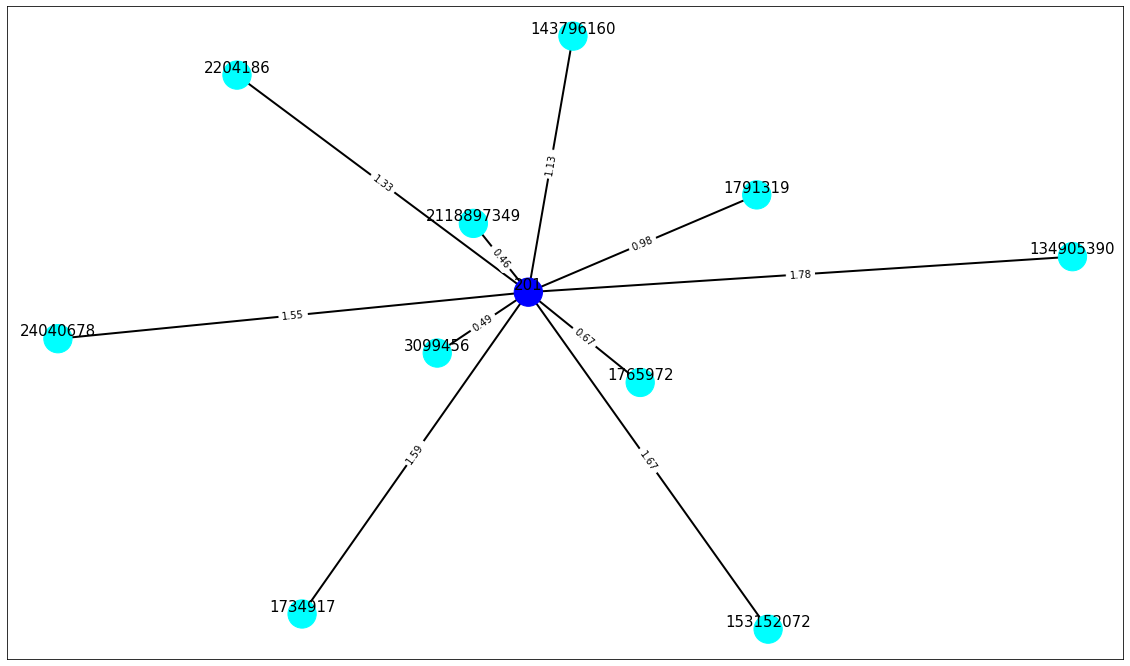

In [43]:
# Create an empty graph
G = nx.Graph()

temp_res_author_ids = res_author_ids[:10]  #variable

# Add nodes for all authors
for author in temp_res_author_ids:
    G.add_node(author)

# Set the root node to be 123
root_node = auth_id

# Add edges between the root node and all other authors based on their ALI difference
for author in temp_res_author_ids:
    if author != root_node:
        ali_diff = res_df_merged[res_df_merged['Author Id List']==author]['ALI_difference'].iloc[0]
        G.add_edge(root_node, author, weight=ali_diff)

# Set node colors and sizes
node_colors = ['blue' if author == root_node else 'cyan' for author in G.nodes()]
node_sizes = [800 for _, node in G.nodes(data=True)]

# Draw the graph
plt.figure(figsize=(20, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos,font_size=15, font_color='black', verticalalignment='bottom')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))

plt.axis('on')
plt.show()

In [41]:
lime-ali
yellow - ali2
cyan - ali3

NameError: name 'lime' is not defined

In [37]:
G# final_temp_1 = operation_set_4(temp_result,domain_list)
def get_matching_values(row,domain_list):    
    matched_sum = 0
    for dom in domain_list:
        if dom in row['Title_counts']:
            matched_sum += row['Title_counts'][dom]
    return matched_sum
temp_result['Frequency'] = temp_result.apply(lambda x: get_matching_values(x,domain_list),axis=1)

In [51]:
# temp_result['Frequency'].idxmax()
# temp_result['ALI_sum'].iloc[52326]
def get_ratio(row):
    if row['log2_ALI2']>0:
        return round(row['Frequency']/row['log2_ALI2'],3)
    else:
        return 0
    
temp_result['Ratio'] = temp_result.apply(lambda x: get_ratio(x),axis=1)

#CURRENTLY ali_with_merged_df is most recently updated dataframe

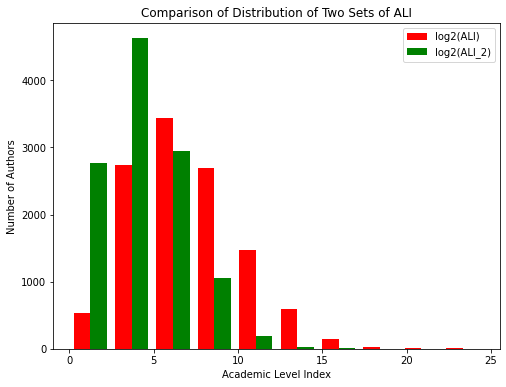

In [140]:
plt.figure(figsize=(8,6))
colors = ['red', 'green']
plt.hist(data_temp_2, bins=10,color=colors)
plt.xlabel('Academic Level Index')
plt.ylabel('Number of Authors')
plt.legend(['log2(ALI)','log2(ALI_2)'])
plt.title('Comparison of Distribution of Two Sets of ALI')

plt.show()

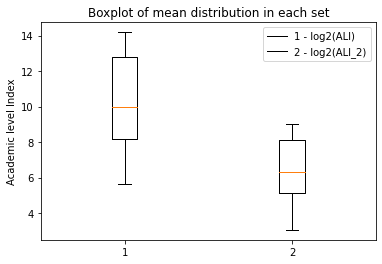

In [146]:
box_colors = ['#0000FF', '#00FF00']
plt.boxplot(data_temp)
# bp = plt.boxplot([temp_1, temp_2], patch_artist=True)

plt.ylabel('Academic level Index')
plt.legend(['1 - log2(ALI)','2 - log2(ALI_2)'])
plt.title('Boxplot of mean distribution in each set')
plt.show()

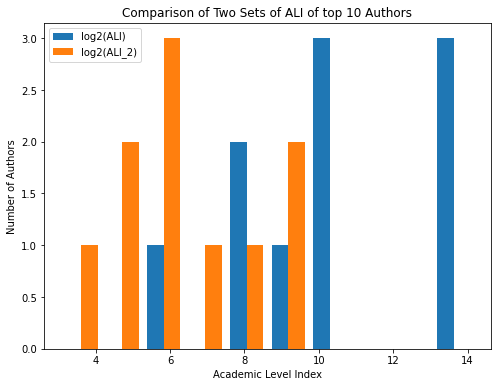

In [141]:
plt.figure(figsize=(8,6))
plt.hist(data_temp, bins=10)
plt.xlabel('Academic Level Index')
plt.ylabel('Number of Authors')
plt.legend(['log2(ALI)','log2(ALI_2)'])
plt.title('Comparison of Two Sets of ALI of top 10 Authors')


plt.show()

In [163]:
temp_df = t2[['Author Id List','ALI_sum','ALI_sum2','Frequency']]
temp_df.rename(columns = {'Author Id List':'Author ID'},inplace=True)
temp_df.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Author ID,ALI_sum,ALI_sum2,Frequency
56103,1724520,12273.968254,512.964697,11
66636,1804703,991.777778,77.403183,10
55130,1718355,13121.900000,389.426050,10
97871,2108508109,1383.660000,93.852634,9
51427,1694235,18634.812500,504.854116,9
197441,4408876,194.928571,23.955121,9
230275,8147588,50.037037,8.266418,8
231434,8391640,1025.272727,81.650366,8
58588,1740430,759.935484,65.964518,8
26152,144541284,206.333333,28.784585,8


In [164]:
temp_df.head(10).describe()

,ALI_sum,ALI_sum2,Frequency
count,10.000000,10.000000,10.000000
mean,4864.262568,178.712169,9.000000
std,6976.868037,204.822719,1.054093
min,50.037037,8.266418,8.000000
25%,344.733871,38.079568,8.000000
50%,1008.525253,79.526774,9.000000
75%,9551.391190,315.532696,9.750000
max,18634.812500,512.964697,11.000000


In [173]:
to_visualize = searched_df[['Author Id List','ALI_sum','ALI_sum2','Title_counts','sort_title_value']]
to_visualize.rename(columns = {'Author Id List':'Author ID','sort_title_value':'Frequency'},inplace=True)
to_visualize.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Author ID,ALI_sum,ALI_sum2,Title_counts,Frequency
56103,1724520,12273.968254,512.964697,"{'learning': 19, 'deep': 15, 'convolutional': ...",11
66636,1804703,991.777778,77.403183,"{'resolution': 1, 'convolutional': 10, 'autoen...",10
55130,1718355,13121.900000,389.426050,"{'convolutional': 10, 'neural': 11, 'network':...",10
97871,2108508109,1383.660000,93.852634,"{'convolutional': 9, 'neural': 10, 'network': ...",9
51427,1694235,18634.812500,504.854116,"{'structure': 1, 'local': 1, 'detection': 3, '...",9
197441,4408876,194.928571,23.955121,"{'convolutional': 9, 'neural': 9, 'networks': ...",9
230275,8147588,50.037037,8.266418,"{'networks': 12, 'classification': 1, 'secure'...",8
231434,8391640,1025.272727,81.650366,"{'model': 3, 'classification': 5, 'detection':...",8
58588,1740430,759.935484,65.964518,"{'detection': 1, 'deep': 5, 'convolutional': 8...",8
26152,144541284,206.333333,28.784585,"{'convolutional': 8, 'neural': 8, 'networks': ...",8


In [174]:
to_visualize = to_visualize.sort_values(by=['Frequency'],ascending=[True])
to_visualize.head(10)

,Author ID,ALI_sum,ALI_sum2,Title_counts,Frequency
207557,48668299,8.000000,4.000000,"{'convolutional': 1, 'neural': 1, 'networks': 1}",1
9230,1388032367,5.000000,2.236068,"{'classification': 1, 'convolutional': 1, 'neu...",1
9314,1388235510,5.000000,2.236068,"{'action': 1, 'temporal': 1, 'graph': 1, 'conv...",1
9795,1390008218,160.000000,26.830952,"{'motor': 1, 'classification': 1, 'convolution...",1
9806,1390015712,22.000000,4.690416,"{'transfer': 1, 'learning': 1, 'classification...",1
11075,1397722752,355.000000,42.130749,"{'structured': 1, 'convolutional': 1}",1
10358,1393497868,1680.000000,183.303028,"{'convolutional': 1, 'neural': 1, 'networks': 1}",1
10383,1393638783,430.666667,51.843030,"{'classification': 1, 'digital': 1, 'analysis'...",1
10527,1394891403,7.000000,2.645751,"{'classification': 1, 'computer': 1, 'natural'...",1
9194,1388006351,14.000000,5.291503,"{'graph': 1, 'convolutional': 1, 'neural': 1, ...",1
